In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F
from torch.optim import Adam, SGD
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.io import imread
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Extracting Zip File
Don't run this cell if images have already been extracted

In [ ]:
# !unzip '/content/drive/MyDrive/ML Project/Base (Non Augmented)/base_feats.zip' -d '/content/drive/MyDrive/ML Project (1)/Base (Non Augmented)/Extracted'
!unzip '/content/drive/MyDrive/ML Project/Augmented Features/augmented_feats.zip' -d '/content/drive/MyDrive/ML Project/Augmented Features/Extracted'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/ML Project/Augmented Features/Extracted/timeshifted_mfcc/172_1b3_Tc_mc_AKGC417L.png  
  inflating: /content/drive/MyDrive/ML Project/Augmented Features/Extracted/timeshifted_mfcc/172_1b4_Al_mc_AKGC417L.png  
  inflating: /content/drive/MyDrive/ML Project/Augmented Features/Extracted/timeshifted_mfcc/172_1b4_Ar_mc_AKGC417L.png  
  inflating: /content/drive/MyDrive/ML Project/Augmented Features/Extracted/timeshifted_mfcc/172_1b4_Ll_mc_AKGC417L.png  
  inflating: /content/drive/MyDrive/ML Project/Augmented Features/Extracted/timeshifted_mfcc/172_1b4_Lr_mc_AKGC417L.png  
  inflating: /content/drive/MyDrive/ML Project/Augmented Features/Extracted/timeshifted_mfcc/172_1b4_Pl_mc_AKGC417L.png  
  inflating: /content/drive/MyDrive/ML Project/Augmented Features/Extracted/timeshifted_mfcc/172_1b4_Pr_mc_AKGC417L.png  
  inflating: /content/drive/MyDrive/ML Project/Augmented Features/Extracted/timeshifted_mfcc/17

#Non-Augmented

##CNN - Spectograms

In [3]:
learning_rate = 0.001
num_epochs = 5
max_iterations = 10000
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/pno_filename_to_diagnoses.csv')
df.head()
# print(df.iloc[456,:])

,pno_string,filename,diagnosis
0,101,101_1b1_Al_sc_Meditron,URTI
1,101,101_1b1_Pr_sc_Meditron,URTI
2,102,102_1b1_Ar_sc_Meditron,Healthy
3,103,103_2b2_Ar_mc_LittC2SE,Asthma
4,104,104_1b1_Al_sc_Litt3200,COPD


In [5]:
diagnosis_to_id = {}
id_to_diagnosis = {}
diagnoses = list(df['diagnosis'].unique())

id = 0
for i in diagnoses:
  diagnosis_to_id[i] = id
  id_to_diagnosis[id] = i
  id += 1

In [6]:
for i in diagnoses:
  df.loc[df.loc[:, 'diagnosis'] == i, 'diagnosis'] = diagnosis_to_id[i]

print(diagnosis_to_id)
print(df[0:50])

{'URTI': 0, 'Healthy': 1, 'Asthma': 2, 'COPD': 3, 'LRTI': 4, 'Bronchiectasis': 5, 'Pneumonia': 6, 'Bronchiolitis': 7}
    pno_string                filename diagnosis
0          101  101_1b1_Al_sc_Meditron         0
1          101  101_1b1_Pr_sc_Meditron         0
2          102  102_1b1_Ar_sc_Meditron         1
3          103  103_2b2_Ar_mc_LittC2SE         2
4          104  104_1b1_Al_sc_Litt3200         3
5          104  104_1b1_Ar_sc_Litt3200         3
6          104  104_1b1_Ll_sc_Litt3200         3
7          104  104_1b1_Lr_sc_Litt3200         3
8          104  104_1b1_Pl_sc_Litt3200         3
9          104  104_1b1_Pr_sc_Litt3200         3
10         105  105_1b1_Tc_sc_Meditron         0
11         106  106_2b1_Pl_mc_LittC2SE         3
12         106  106_2b1_Pr_mc_LittC2SE         3
13         107  107_2b3_Al_mc_AKGC417L         3
14         107  107_2b3_Ar_mc_AKGC417L         3
15         107  107_2b3_Ll_mc_AKGC417L         3
16         107  107_2b3_Lr_mc_AKGC417L         3


101_1b1_Al_sc_Meditron.png


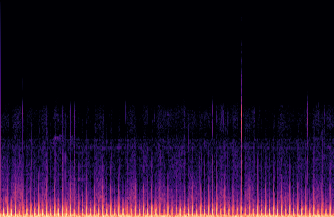

In [ ]:
folder_path_spec = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_spectrograms/'
images_spec = os.listdir(folder_path_spec)
print(images_spec[0])
im_spec = images_spec[0]

Image(folder_path_spec + im_spec)

In [19]:
x_spec = []

for i,img_name in enumerate(df['filename']):
    im_path = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_spectrograms/' + str(img_name) + '.png'
    img = imread(im_path, as_gray=False)
    img =  img / 255.0  #Normalisation
    img = img.astype('float32')
    x_spec.append(img)
    # x_spec.append(img_name) -> Debug


x_spec = np.array(x_spec)
y_spec = df['diagnosis'].to_numpy()

# print(x_spec, y_spec)

# print(len(train_spec))

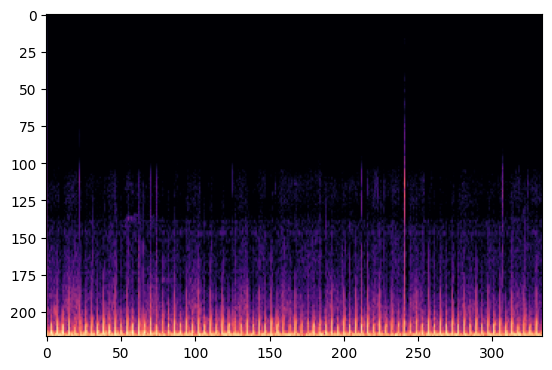

In [ ]:
#Printing image as test
plt.imshow(x_spec[0])

In [22]:
#Data set splitting
x_train_spec, x_test_spec, y_train_spec, y_test_spec = train_test_split(x_spec, y_spec, test_size=0.2, random_state=42)
x_val_spec, x_test_spec, y_val_spec, y_test_spec = train_test_split(x_test_spec, y_test_spec, test_size=0.5, random_state=42)

print("Train set:", x_train_spec.shape, y_train_spec.shape)
print("Validation set:", x_val_spec.shape, y_val_spec.shape)
print("Test set:", x_test_spec.shape, y_test_spec.shape)

Train set: (736, 217, 334, 4) (736,)
Validation set: (92, 217, 334, 4) (92,)
Test set: (92, 217, 334, 4) (92,)


In [23]:
x_train_spec_torch = torch.from_numpy(x_train_spec)
x_train_spec_torch = torch.transpose(x_train_spec_torch, 1, 3)
x_train_spec_torch = torch.transpose(x_train_spec_torch, 2, 3).to(DEVICE)

y_train_spec = y_train_spec.astype(int)
y_train_spec_torch = torch.from_numpy(y_train_spec).to(DEVICE)

x_val_spec_torch = torch.from_numpy(x_val_spec)
x_val_spec_torch = torch.transpose(x_val_spec_torch, 1, 3)
x_val_spec_torch = torch.transpose(x_val_spec_torch, 2, 3).to(DEVICE)

y_val_spec = y_val_spec.astype(int)
y_val_spec_torch = torch.from_numpy(y_val_spec).to(DEVICE)

x_test_spec_torch = torch.from_numpy(x_test_spec)
x_test_spec_torch = torch.transpose(x_test_spec_torch, 1, 3)
x_test_spec_torch = torch.transpose(x_test_spec_torch, 2, 3).to(DEVICE)

y_test_spec = y_test_spec.astype(int)
y_test_spec_torch = torch.from_numpy(y_test_spec).to(DEVICE)

x_train_spec_torch.shape, y_train_spec_torch.shape

(torch.Size([736, 4, 217, 334]), torch.Size([736]))

In [24]:
class CNN_spec(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(4, 8, 10)
      self.pool = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(8, 16, 10)
      self.fc_input_size = self._get_conv_output_size()
      self.fc1 = nn.Linear(self.fc_input_size, 120)
      self.fc2 = nn.Linear(120, 84)
      self.fc3 = nn.Linear(84, 8)
      self.softmax = nn.Softmax(-1)

  def _get_conv_output_size(self):
      # Test with a dummy input to get the size after convolutions and pooling
      with torch.no_grad():
          x = torch.zeros(1, 4, 217, 334)  # Create a dummy tensor
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          return x.size(1) * x.size(2) * x.size(3)

  def forward(self, x):
      # print(x.shape)
      x = self.pool(F.relu(self.conv1(x)))
      # print(x.shape)
      x = self.pool(F.relu(self.conv2(x)))
      # print(x.shape)
      x = torch.flatten(x, 1) # flatten all dimensions except batch
      # print(x.shape)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

In [ ]:
model = CNN_spec().to(DEVICE)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss().to(DEVICE)
# if torch.cuda.is_available():
#     model = model.cuda()
#     criterion = criterion.cuda()

print(model)

CNN_spec(
  (conv1): Conv2d(4, 8, kernel_size=(10, 10), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(10, 10), stride=(1, 1))
  (fc1): Linear(in_features=57152, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
  (softmax): Softmax(dim=-1)
)


In [ ]:
loss_history = []
for epoch in range(num_epochs):

  for i in range(max_iterations):

    outputs = model(x_train_spec_torch)
    y = y_train_spec_torch

    loss = criterion(outputs, y)

    if ((i+1)%10 == 0):
      loss_history.append(loss.item())

    if ((i+1)%100==0):
      print(f"[Iteration {i+1}] Loss = {loss_history[-1]}")

    if ((i+1)%500 == 0):
      torch.save(model.state_dict(), f'/content/drive/MyDrive/ML Project/Base (Non Augmented)/m_iter{i+1}_epoch{epoch}.pth')

    loss.backward()
    optimizer.step()

[Iteration 100] Loss = 2.482743501663208
[Iteration 200] Loss = 0.9809300899505615
[Iteration 300] Loss = 1.1153478622436523
[Iteration 400] Loss = 0.9279224276542664
[Iteration 500] Loss = 0.7093353271484375
[Iteration 600] Loss = 0.6469269394874573
[Iteration 700] Loss = 0.6082025170326233
[Iteration 800] Loss = 0.6426787972450256
[Iteration 900] Loss = 0.5964187979698181
[Iteration 1000] Loss = 0.6205724477767944
[Iteration 1100] Loss = 0.6014170050621033
[Iteration 1200] Loss = 0.6444763541221619
[Iteration 1300] Loss = 0.6643145084381104
[Iteration 1400] Loss = 0.7258989214897156
[Iteration 1500] Loss = 0.7741156816482544
[Iteration 1600] Loss = 0.5924440622329712
[Iteration 1700] Loss = 0.6009535789489746
[Iteration 1800] Loss = 0.9206366539001465
[Iteration 1900] Loss = 0.8924869298934937
[Iteration 2000] Loss = 0.6738035678863525
[Iteration 2100] Loss = 0.621330201625824
[Iteration 2200] Loss = 0.6296854019165039
[Iteration 2300] Loss = 0.6189815402030945
[Iteration 2400] Loss 

KeyboardInterrupt: ignored

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/ML Project/Base (Non Augmented)/m1.pth')

In [25]:
checkpoint = torch.load('/content/drive/MyDrive/ML Project/Base (Non Augmented)/m_iter1000_epoch0.pth')
model_checkpoint = CNN_spec().to(DEVICE)
model_checkpoint.load_state_dict(checkpoint)
print(model_checkpoint)
# print(test)

CNN_spec(
  (conv1): Conv2d(4, 8, kernel_size=(10, 10), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(10, 10), stride=(1, 1))
  (fc1): Linear(in_features=57152, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
  (softmax): Softmax(dim=-1)
)


In [26]:
#Training
probs_train_spec = F.softmax(model_checkpoint(x_train_spec_torch), dim=-1)
labels_train_spec = torch.argmax(probs_train_spec, dim=1)
acc_train_spec = accuracy_score(y_train_spec_torch.cpu(), labels_train_spec.cpu())
print("Training accuracy:", acc_train_spec)

#Validation
probs_val_spec = F.softmax(model_checkpoint(x_val_spec_torch), dim=-1)
labels_val_spec = torch.argmax(probs_val_spec, dim=1)
acc_val_spec = accuracy_score(y_val_spec_torch.cpu(), labels_val_spec.cpu())
print("Validation accuracy:", acc_val_spec)

#Testing
probs_test_spec = F.softmax(model_checkpoint(x_test_spec_torch), dim=-1)
labels_test_spec = torch.argmax(probs_test_spec, dim=1)
acc_test_spec = accuracy_score(y_test_spec_torch.cpu(), labels_test_spec.cpu())
print("Testing accuracy:", acc_test_spec)

Training accuracy: 0.873641304347826
Validation accuracy: 0.8152173913043478
Testing accuracy: 0.8152173913043478


350


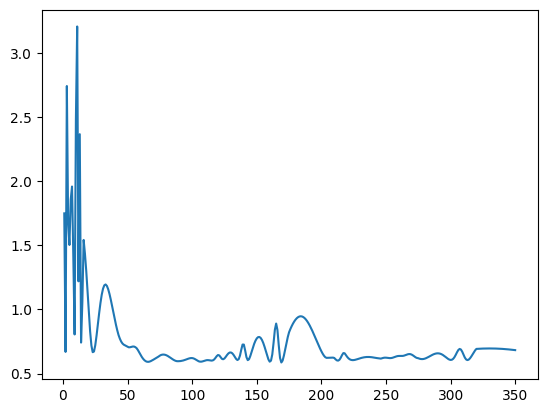

In [ ]:
print(len(loss_history))

# y = []

# for i in loss_history:
#   y.append(i.item())

plt.plot(range(1,350+1), loss_history)
plt.show()

##MFCCs

103_2b2_Ar_mc_LittC2SE.png


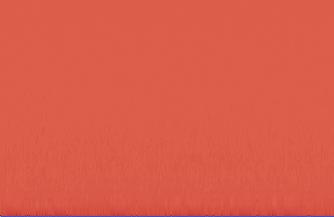

In [ ]:
folder_path_mfcc = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_mfccs/'
images_mfcc = os.listdir(folder_path_mfcc)
print(images_mfcc[0])
im_mfcc = images_mfcc[0]

Image(folder_path_mfcc + im_mfcc)

In [7]:
x_mfcc = []

for i,img_name in enumerate(df['filename']):
    im_path = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_mfccs/' + str(img_name) + '.png'
    img = imread(im_path, as_gray=False)
    img =  img / 255.0  #Normalisation
    img = img.astype('float32')
    x_mfcc.append(img)
    # x_spec.append(img_name) -> Debug


x_mfcc = np.array(x_mfcc)
y_mfcc = df['diagnosis'].to_numpy()

# print(x_mfcc, y_mfcc)

# print(len(train_mfcc))

In [8]:
#Data set splitting
x_train_mfcc, x_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(x_mfcc, y_mfcc, test_size=0.2, random_state=30)
x_val_mfcc, x_test_mfcc, y_val_mfcc, y_test_mfcc = train_test_split(x_test_mfcc, y_test_mfcc, test_size=0.5, random_state=30)

print("Train set:", x_train_mfcc.shape, y_train_mfcc.shape)
print("Validation set:", x_val_mfcc.shape, y_val_mfcc.shape)
print("Test set:", x_test_mfcc.shape, y_test_mfcc.shape)

x_train_mfcc_torch = torch.from_numpy(x_train_mfcc)
x_train_mfcc_torch = torch.transpose(x_train_mfcc_torch, 1, 3)
x_train_mfcc_torch = torch.transpose(x_train_mfcc_torch, 2, 3).to(DEVICE)

y_train_mfcc = y_train_mfcc.astype(int)
y_train_mfcc_torch = torch.from_numpy(y_train_mfcc).to(DEVICE)

x_val_mfcc_torch = torch.from_numpy(x_val_mfcc)
x_val_mfcc_torch = torch.transpose(x_val_mfcc_torch, 1, 3)
x_val_mfcc_torch = torch.transpose(x_val_mfcc_torch, 2, 3).to(DEVICE)

y_val_mfcc = y_val_mfcc.astype(int)
y_val_mfcc_torch = torch.from_numpy(y_val_mfcc).to(DEVICE)

x_test_mfcc_torch = torch.from_numpy(x_test_mfcc)
x_test_mfcc_torch = torch.transpose(x_test_mfcc_torch, 1, 3)
x_test_mfcc_torch = torch.transpose(x_test_mfcc_torch, 2, 3).to(DEVICE)

y_test_mfcc = y_test_mfcc.astype(int)
y_test_mfcc_torch = torch.from_numpy(y_test_mfcc).to(DEVICE)

x_train_mfcc_torch.shape, y_train_mfcc_torch.shape

Train set: (736, 217, 334, 4) (736,)
Validation set: (92, 217, 334, 4) (92,)
Test set: (92, 217, 334, 4) (92,)


(torch.Size([736, 4, 217, 334]), torch.Size([736]))

In [9]:
class CNN_mfcc(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(4, 8, 10)
      self.pool = nn.MaxPool2d(4, 4)
      self.conv2 = nn.Conv2d(8, 16, 10)
      self.fc_input_size = self._get_conv_output_size()
      self.fc1 = nn.Linear(self.fc_input_size, 128)
      self.fc2 = nn.Linear(128, 64)
      self.fc3 = nn.Linear(64, 8)
      self.softmax = nn.Softmax(-1)

  def _get_conv_output_size(self):
      # Test with a dummy input to get the size after convolutions and pooling
      with torch.no_grad():
          x = torch.zeros(1, 4, 217, 334)  # Create a dummy tensor
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          return x.size(1) * x.size(2) * x.size(3)

  def forward(self, x):
      # print(x.shape)
      x = self.pool(F.relu(self.conv1(x)))
      # print(x.shape)
      x = self.pool(F.relu(self.conv2(x)))
      # print(x.shape)
      x = torch.flatten(x, 1) # flatten all dimensions except batch
      # print(x.shape)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

In [ ]:
learning_rate = 0.01
num_epochs = 5
max_iterations = 1000

In [ ]:
model_mfcc = CNN_mfcc().to(DEVICE)
optimizer = torch.optim.AdamW(model_mfcc.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss().to(DEVICE)

In [ ]:
loss_history_mfcc = []
for epoch in range(num_epochs):

  for i in range(max_iterations):

    outputs = model_mfcc(x_train_mfcc_torch)
    y = y_train_mfcc_torch

    loss = criterion(outputs, y)

    if ((i+1)%10 == 0):
      loss_history_mfcc.append(loss.item())

    if ((i+1)%100==0):
      print(f"[Iteration {i+1}] Loss = {loss_history_mfcc[-1]}")

    if ((i+1)%500 == 0):
      torch.save(model_mfcc.state_dict(), f'/content/drive/MyDrive/ML Project/Base (Non Augmented)/mfcc/m_iter{i+1}_epoch{epoch}.pth')

    loss.backward()
    optimizer.step()

[Iteration 100] Loss = 0.8330219984054565
[Iteration 200] Loss = 0.7301964163780212
[Iteration 300] Loss = 0.9463895559310913
[Iteration 400] Loss = 1.0867105722427368
[Iteration 500] Loss = 1.1315772533416748
[Iteration 600] Loss = 1.0792720317840576
[Iteration 700] Loss = 1.0445623397827148
[Iteration 800] Loss = 0.8938327431678772
[Iteration 900] Loss = 0.847655177116394
[Iteration 1000] Loss = 0.8007212281227112
[Iteration 100] Loss = 0.7955327033996582
[Iteration 200] Loss = 0.8105807900428772
[Iteration 300] Loss = 0.8256739974021912
[Iteration 400] Loss = 0.9086235761642456


KeyboardInterrupt: ignored

In [10]:
checkpoint = torch.load('/content/drive/MyDrive/ML Project/Base (Non Augmented)/mfcc/m_iter500_epoch0.pth')
model_checkpoint = CNN_mfcc().to(DEVICE)
model_checkpoint.load_state_dict(checkpoint)
print(model_checkpoint)
# print(test)

CNN_mfcc(
  (conv1): Conv2d(4, 8, kernel_size=(10, 10), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(10, 10), stride=(1, 1))
  (fc1): Linear(in_features=2880, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=8, bias=True)
  (softmax): Softmax(dim=-1)
)


In [11]:
#Training
probs_train_mfcc = F.softmax(model_checkpoint(x_train_mfcc_torch), dim=-1)
labels_train_mfcc = torch.argmax(probs_train_mfcc, dim=1)
acc_train_mfcc = accuracy_score(y_train_mfcc_torch.cpu(), labels_train_mfcc.cpu())
print("Training accuracy:", acc_train_mfcc)

#Validation
probs_val_mfcc = F.softmax(model_checkpoint(x_val_mfcc_torch), dim=-1)
labels_val_mfcc = torch.argmax(probs_val_mfcc, dim=1)
acc_val_mfcc = accuracy_score(y_val_mfcc_torch.cpu(), labels_val_mfcc.cpu())
print("Validation accuracy:", acc_val_mfcc)

#Testing
probs_test_mfcc = F.softmax(model_checkpoint(x_test_mfcc_torch), dim=-1)
labels_test_mfcc = torch.argmax(probs_test_mfcc, dim=1)
acc_test_mfcc = accuracy_score(y_test_mfcc_torch.cpu(), labels_test_mfcc.cpu())
print("Testing accuracy:", acc_test_mfcc)

Training accuracy: 0.8546195652173914
Validation accuracy: 0.9021739130434783
Testing accuracy: 0.8804347826086957


##Chromagrams

107_2b3_Ar_mc_AKGC417L.png


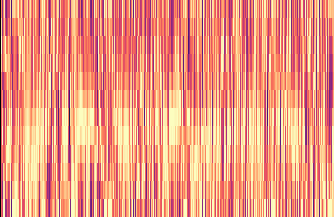

In [ ]:
folder_path_chrom = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_chromagrams/'
images_chrom = os.listdir(folder_path_chrom)
print(images_chrom[0])
im_chrom = images_chrom[0]

Image(folder_path_chrom + im_chrom)

In [12]:
x_chrom = []

for i,img_name in enumerate(df['filename']):
    im_path = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_chromagrams/' + str(img_name) + '.png'
    img = imread(im_path, as_gray=False)
    img =  img / 255.0  #Normalisation
    img = img.astype('float32')
    x_chrom.append(img)
    # x_spec.append(img_name) -> Debug


x_chrom = np.array(x_chrom)
y_chrom = df['diagnosis'].to_numpy()

# print(x_mfcc, y_mfcc)

# print(len(train_mfcc))

In [13]:
#Data set splitting
x_train_chrom, x_test_chrom, y_train_chrom, y_test_chrom = train_test_split(x_chrom, y_chrom, test_size=0.2, random_state=15)
x_val_chrom, x_test_chrom, y_val_chrom, y_test_chrom = train_test_split(x_test_chrom, y_test_chrom, test_size=0.5, random_state=15)

print("Train set:", x_train_chrom.shape, y_train_chrom.shape)
print("Validation set:", x_val_chrom.shape, y_val_chrom.shape)
print("Test set:", x_test_chrom.shape, y_test_chrom.shape)

x_train_chrom_torch = torch.from_numpy(x_train_chrom)
x_train_chrom_torch = torch.transpose(x_train_chrom_torch, 1, 3)
x_train_chrom_torch = torch.transpose(x_train_chrom_torch, 2, 3).to(DEVICE)

y_train_chrom = y_train_chrom.astype(int)
y_train_chrom_torch = torch.from_numpy(y_train_chrom).to(DEVICE)

x_val_chrom_torch = torch.from_numpy(x_val_chrom)
x_val_chrom_torch = torch.transpose(x_val_chrom_torch, 1, 3)
x_val_chrom_torch = torch.transpose(x_val_chrom_torch, 2, 3).to(DEVICE)

y_val_chrom = y_val_chrom.astype(int)
y_val_chrom_torch = torch.from_numpy(y_val_chrom).to(DEVICE)

x_test_chrom_torch = torch.from_numpy(x_test_chrom)
x_test_chrom_torch = torch.transpose(x_test_chrom_torch, 1, 3)
x_test_chrom_torch = torch.transpose(x_test_chrom_torch, 2, 3).to(DEVICE)

y_test_chrom = y_test_chrom.astype(int)
y_test_chrom_torch = torch.from_numpy(y_test_chrom).to(DEVICE)

x_train_chrom_torch.shape, y_train_chrom_torch.shape

Train set: (736, 217, 334, 4) (736,)
Validation set: (92, 217, 334, 4) (92,)
Test set: (92, 217, 334, 4) (92,)


(torch.Size([736, 4, 217, 334]), torch.Size([736]))

In [14]:
class CNN_chrom(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(4, 8, 10)
      self.pool = nn.MaxPool2d(4, 4)
      self.conv2 = nn.Conv2d(8, 16, 10)
      self.fc_input_size = self._get_conv_output_size()
      self.fc1 = nn.Linear(self.fc_input_size, 256)
      self.fc2 = nn.Linear(256, 64)
      self.fc3 = nn.Linear(64, 8)
      self.softmax = nn.Softmax(-1)

  def _get_conv_output_size(self):
      # Test with a dummy input to get the size after convolutions and pooling
      with torch.no_grad():
          x = torch.zeros(1, 4, 217, 334)  # Create a dummy tensor
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          return x.size(1) * x.size(2) * x.size(3)

  def forward(self, x):
      # print(x.shape)
      x = self.pool(F.relu(self.conv1(x)))
      # print(x.shape)
      x = self.pool(F.relu(self.conv2(x)))
      # print(x.shape)
      x = torch.flatten(x, 1) # flatten all dimensions except batch
      # print(x.shape)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

In [ ]:
learning_rate = 0.001
num_epochs = 5
max_iterations = 5000

In [ ]:
model_chrom = CNN_chrom().to(DEVICE)
optimizer = torch.optim.AdamW(model_chrom.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss().to(DEVICE)

In [ ]:
loss_history_chrom = []
for epoch in range(num_epochs):

  for i in range(max_iterations):

    outputs = model_chrom(x_train_chrom_torch)
    y = y_train_chrom_torch

    loss = criterion(outputs, y)

    if ((i+1)%10 == 0):
      loss_history_chrom.append(loss.item())

    if ((i+1)%100==0):
      print(f"[Iteration {i+1}] Loss = {loss_history_chrom[-1]}")

    if ((i+1)%500 == 0):
      torch.save(model_chrom.state_dict(), f'/content/drive/MyDrive/ML Project/Base (Non Augmented)/chromagram/m_iter{i+1}_epoch{epoch}.pth')

    loss.backward()
    optimizer.step()

[Iteration 100] Loss = 2.4901182651519775
[Iteration 200] Loss = 1.5472882986068726
[Iteration 300] Loss = 0.8997482657432556
[Iteration 400] Loss = 0.7586842179298401
[Iteration 500] Loss = 0.6383277177810669


KeyboardInterrupt: ignored

In [15]:
checkpoint = torch.load('/content/drive/MyDrive/ML Project/Base (Non Augmented)/chromagram/m_iter500_epoch0.pth')
model_checkpoint = CNN_chrom().to(DEVICE)
model_checkpoint.load_state_dict(checkpoint)
print(model_checkpoint)
# print(test)

CNN_chrom(
  (conv1): Conv2d(4, 8, kernel_size=(10, 10), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(10, 10), stride=(1, 1))
  (fc1): Linear(in_features=2880, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=8, bias=True)
  (softmax): Softmax(dim=-1)
)


In [16]:
#Training
probs_train_chrom = F.softmax(model_checkpoint(x_train_chrom_torch), dim=-1)
labels_train_chrom = torch.argmax(probs_train_chrom, dim=1)
acc_train_chrom = accuracy_score(y_train_chrom_torch.cpu(), labels_train_chrom.cpu())
print("Training accuracy:", acc_train_chrom)

#Validation
probs_val_chrom = F.softmax(model_checkpoint(x_val_chrom_torch), dim=-1)
labels_val_chrom = torch.argmax(probs_val_chrom, dim=1)
acc_val_chrom = accuracy_score(y_val_chrom_torch.cpu(), labels_val_chrom.cpu())
print("Validation accuracy:", acc_val_chrom)

#Testing
probs_test_chrom = F.softmax(model_checkpoint(x_test_chrom_torch), dim=-1)
labels_test_chrom = torch.argmax(probs_test_chrom, dim=1)
acc_test_chrom = accuracy_score(y_test_chrom_torch.cpu(), labels_test_chrom.cpu())
print("Testing accuracy:", acc_test_chrom)

Training accuracy: 0.8654891304347826
Validation accuracy: 0.8478260869565217
Testing accuracy: 0.8478260869565217


##cens

106_2b1_Pr_mc_LittC2SE.png


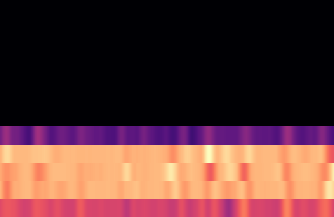

In [ ]:
folder_path_cens = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_cens/'
images_cens = os.listdir(folder_path_cens)
print(images_cens[0])
im_cens = images_cens[0]

Image(folder_path_cens + im_cens)

In [7]:
x_cens = []

for i,img_name in enumerate(df['filename']):
    im_path = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_cens/' + str(img_name) + '.png'
    img = imread(im_path, as_gray=False)
    img =  img / 255.0  #Normalisation
    img = img.astype('float32')
    x_cens.append(img)
    # x_spec.append(img_name) -> Debug


x_cens = np.array(x_cens)
y_cens = df['diagnosis'].to_numpy()

# print(x_mfcc, y_mfcc)

# print(len(train_mfcc))

In [16]:
#Data set splitting
x_train_cens, x_test_cens, y_train_cens, y_test_cens = train_test_split(x_cens, y_cens, test_size=0.2, random_state=575)
x_val_cens, x_test_cens, y_val_cens, y_test_cens = train_test_split(x_test_cens, y_test_cens, test_size=0.5, random_state=575)

print("Train set:", x_train_cens.shape, y_train_cens.shape)
print("Validation set:", x_val_cens.shape, y_val_cens.shape)
print("Test set:", x_test_cens.shape, y_test_cens.shape)

x_train_cens_torch = torch.from_numpy(x_train_cens)
x_train_cens_torch = torch.transpose(x_train_cens_torch, 1, 3)
x_train_cens_torch = torch.transpose(x_train_cens_torch, 2, 3).to(DEVICE)

y_train_cens = y_train_cens.astype(int)
y_train_cens_torch = torch.from_numpy(y_train_cens).to(DEVICE)

x_val_cens_torch = torch.from_numpy(x_val_cens)
x_val_cens_torch = torch.transpose(x_val_cens_torch, 1, 3)
x_val_cens_torch = torch.transpose(x_val_cens_torch, 2, 3).to(DEVICE)

y_val_cens = y_val_cens.astype(int)
y_val_cens_torch = torch.from_numpy(y_val_cens).to(DEVICE)

x_test_cens_torch = torch.from_numpy(x_test_cens)
x_test_cens_torch = torch.transpose(x_test_cens_torch, 1, 3)
x_test_cens_torch = torch.transpose(x_test_cens_torch, 2, 3).to(DEVICE)

y_test_cens = y_test_cens.astype(int)
y_test_cens_torch = torch.from_numpy(y_test_cens).to(DEVICE)

x_train_cens_torch.shape, y_train_cens_torch.shape

Train set: (736, 217, 334, 4) (736,)
Validation set: (92, 217, 334, 4) (92,)
Test set: (92, 217, 334, 4) (92,)


(torch.Size([736, 4, 217, 334]), torch.Size([736]))

In [9]:
class CNN_cens(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(4, 8, 10)
      self.pool = nn.MaxPool2d(4, 4)
      self.conv2 = nn.Conv2d(8, 16, 10)
      self.fc_input_size = self._get_conv_output_size()
      self.fc1 = nn.Linear(self.fc_input_size, 256)
      self.fc2 = nn.Linear(256, 128)
      self.fc3 = nn.Linear(128, 8)
      self.softmax = nn.Softmax(-1)

  def _get_conv_output_size(self):
      # Test with a dummy input to get the size after convolutions and pooling
      with torch.no_grad():
          x = torch.zeros(1, 4, 217, 334)  # Create a dummy tensor
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          return x.size(1) * x.size(2) * x.size(3)

  def forward(self, x):
      # print(x.shape)
      x = self.pool(F.relu(self.conv1(x)))
      # print(x.shape)
      x = self.pool(F.relu(self.conv2(x)))
      # print(x.shape)
      x = torch.flatten(x, 1) # flatten all dimensions except batch
      # print(x.shape)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

In [ ]:
learning_rate = 0.01
num_epochs = 3
max_iterations = 1000

In [ ]:
model_cens = CNN_cens().to(DEVICE)
optimizer = torch.optim.AdamW(model_cens.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss().to(DEVICE)

In [ ]:
loss_history_cens = []
for epoch in range(num_epochs):

  for i in range(max_iterations):

    outputs = model_cens(x_train_cens_torch)
    y = y_train_cens_torch

    loss = criterion(outputs, y)

    if ((i+1)%10 == 0):
      loss_history_cens.append(loss.item())

    if ((i+1)%100==0):
      print(f"[Iteration {i+1}] Loss = {loss_history_cens[-1]}")

    if ((i+1)%500 == 0):
      torch.save(model_cens.state_dict(), f'/content/drive/MyDrive/ML Project/Base (Non Augmented)/cens/m_iter{i+1}_epoch{epoch}.pth')

    loss.backward()
    optimizer.step()

[Iteration 100] Loss = 1.765191674232483
[Iteration 200] Loss = 0.6540423631668091
[Iteration 300] Loss = 0.7929325699806213
[Iteration 400] Loss = 0.7808761596679688
[Iteration 500] Loss = 0.6965122818946838
[Iteration 600] Loss = 0.8123260140419006
[Iteration 700] Loss = 0.6866751909255981
[Iteration 800] Loss = 0.797757625579834
[Iteration 900] Loss = 0.8673100471496582
[Iteration 1000] Loss = 0.8200340867042542


KeyboardInterrupt: ignored

In [10]:
checkpoint = torch.load('/content/drive/MyDrive/ML Project/Base (Non Augmented)/cens/m_iter1000_epoch0.pth')
model_checkpoint = CNN_cens().to(DEVICE)
model_checkpoint.load_state_dict(checkpoint)
print(model_checkpoint)
# print(test)

CNN_cens(
  (conv1): Conv2d(4, 8, kernel_size=(10, 10), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(10, 10), stride=(1, 1))
  (fc1): Linear(in_features=2880, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=8, bias=True)
  (softmax): Softmax(dim=-1)
)


In [17]:
#Training
probs_train_cens = F.softmax(model_checkpoint(x_train_cens_torch), dim=-1)
labels_train_cens = torch.argmax(probs_train_cens, dim=1)
acc_train_cens = accuracy_score(y_train_cens_torch.cpu(), labels_train_cens.cpu())
print("Training accuracy:", acc_train_cens)

#Validation
probs_val_cens = F.softmax(model_checkpoint(x_val_cens_torch), dim=-1)
labels_val_cens = torch.argmax(probs_val_cens, dim=1)
acc_val_cens = accuracy_score(y_val_cens_torch.cpu(), labels_val_cens.cpu())
print("Validation accuracy:", acc_val_cens)

#Testing
probs_test_cens = F.softmax(model_checkpoint(x_test_cens_torch), dim=-1)
labels_test_cens = torch.argmax(probs_test_cens, dim=1)
acc_test_cens = accuracy_score(y_test_cens_torch.cpu(), labels_test_cens.cpu())
print("Testing accuracy:", acc_test_cens)

Training accuracy: 0.8695652173913043
Validation accuracy: 0.8260869565217391
Testing accuracy: 0.8369565217391305


#Augmented Dataset

##cens

106_2b1_Pr_mc_LittC2SE.png


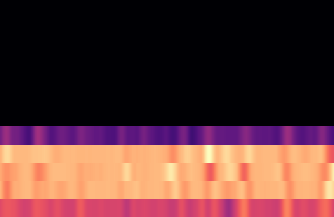

In [ ]:
folder_path_cens = '/content/drive/MyDrive/ML Project/Base (Non Augmented)/Extracted/base_cens/'
images_cens = os.listdir(folder_path_cens)
print(images_cens[0])
im_cens = images_cens[0]

Image(folder_path_cens + im_cens)

In [ ]:
x_cens_aug = []
y_cens_aug = []


for i,img_name in enumerate(df['filename']):
  for j in ['noisy', 'timeshifted', 'pitchshifted']:
    im_path = f'/content/drive/MyDrive/ML Project/Augmented Features/Extracted/{j}_cens/' + str(img_name) + '.png'
    img = imread(im_path, as_gray=False)
    img =  img / 255.0  #Normalisation
    img = img.astype('float32')
    x_cens_aug.append(img)
    y_cens_aug.append(df.loc[df.loc[:,'filename'] == img_name, 'diagnosis'])
    # x_spec.append(img_name) -> Debug


x_cens_aug = np.array(x_cens_aug)
y_cens_aug = np.array(y_cens_aug)

print(y_cens_aug.shape)
# y_cens = df['diagnosis'].to_numpy()

# print(x_mfcc, y_mfcc)

# print(len(train_mfcc))

AttributeError: ignored

In [ ]:
print(y_cens_aug.shape)

(2760, 1)


In [ ]:
#Data set splitting
x_train_cens_aug, x_test_cens_aug, y_train_cens_aug, y_test_cens_aug = train_test_split(x_cens_aug, y_cens_aug, test_size=0.2, random_state=42)
x_val_cens_aug, x_test_cens_aug, y_val_cens_aug, y_test_cens_aug = train_test_split(x_test_cens_aug, y_test_cens_aug, test_size=0.5, random_state=42)

print("Train set:", x_train_cens_aug.shape, y_train_cens_aug.shape)
print("Validation set:", x_val_cens_aug.shape, y_val_cens_aug.shape)
print("Test set:", x_test_cens_aug.shape, y_test_cens_aug.shape)

x_train_cens_aug_torch = torch.from_numpy(x_train_cens_aug)
x_train_cens_aug_torch = torch.transpose(x_train_cens_aug_torch, 1, 3)
x_train_cens_aug_torch = torch.transpose(x_train_cens_aug_torch, 2, 3).to(DEVICE)

y_train_cens_aug = y_train_cens_aug.astype(int)
y_train_cens_aug_torch = torch.from_numpy(y_train_cens_aug).to(DEVICE)

x_val_cens_aug_torch = torch.from_numpy(x_val_cens_aug)
x_val_cens_aug_torch = torch.transpose(x_val_cens_aug_torch, 1, 3)
x_val_cens_aug_torch = torch.transpose(x_val_cens_aug_torch, 2, 3).to(DEVICE)

y_val_cens_aug = y_val_cens_aug.astype(int)
y_val_cens_aug_torch = torch.from_numpy(y_val_cens_aug).to(DEVICE)

x_train_cens_aug_torch.shape, y_train_cens_aug_torch.shape

Train set: (2208, 217, 334, 4) (2208, 1)
Validation set: (276, 217, 334, 4) (276, 1)
Test set: (276, 217, 334, 4) (276, 1)


(torch.Size([2208, 4, 217, 334]), torch.Size([2208, 1]))

In [ ]:
class CNN_cens_aug(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(4, 8, 10)
      self.pool = nn.MaxPool2d(4, 4)
      self.conv2 = nn.Conv2d(8, 16, 10)
      self.fc_input_size = self._get_conv_output_size()
      self.fc1 = nn.Linear(self.fc_input_size, 256)
      self.fc2 = nn.Linear(256, 128)
      self.fc3 = nn.Linear(128, 8)
      self.softmax = nn.Softmax(-1)

  def _get_conv_output_size(self):
      # Test with a dummy input to get the size after convolutions and pooling
      with torch.no_grad():
          x = torch.zeros(1, 4, 217, 334)  # Create a dummy tensor
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          return x.size(1) * x.size(2) * x.size(3)

  def forward(self, x):
      # print(x.shape)
      x = self.pool(F.relu(self.conv1(x)))
      # print(x.shape)
      x = self.pool(F.relu(self.conv2(x)))
      # print(x.shape)
      x = torch.flatten(x, 1) # flatten all dimensions except batch
      # print(x.shape)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

In [ ]:
learning_rate = 0.01
num_epochs = 3
max_iterations = 1000

In [ ]:
model_cens_aug = CNN_cens_aug().to(DEVICE)
optimizer = torch.optim.AdamW(model_cens_aug.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss().to(DEVICE)

In [ ]:
loss_history_cens_aug = []
for epoch in range(num_epochs):

  for i in range(max_iterations):

    outputs = model_cens_aug(x_train_cens_aug_torch)
    y = y_train_cens_aug_torch

    loss = criterion(outputs, y)

    if ((i+1)%10 == 0):
      loss_history_cens_aug.append(loss.item())

    if ((i+1)%100==0):
      print(f"[Iteration {i+1}] Loss = {loss_history_cens_aug[-1]}")

    if ((i+1)%500 == 0):
      torch.save(model_cens_aug.state_dict(), f'/content/drive/MyDrive/ML Project/Augmented Features/cens/m_iter{i+1}_epoch{epoch}.pth')

    loss.backward()
    optimizer.step()

RuntimeError: ignored